In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import itertools
import matplotlib.pyplot as pl
%matplotlib inline
import matplotlib.gridspec as gridspec

import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

## Leitura dos dados

In [2]:
def read_dataset(path, name):
    """
    Leitura dos datasets de quase todos os resultados do SHAP e das 
    medidas de fairness. Faltando apenas resultados obtidos com 
    Linear SHAP considerando indepêndencia entre as features
    """
    df_shap = pd.read_csv(path + 'result_shap_{}.csv'.format(name))
    if 'Unnamed: 0' in df_shap.columns:
        df_shap.drop('Unnamed: 0', axis=1, inplace=True)
    
    df_fairn = pd.read_csv(path + 'result_fairness_{}.csv'.format(name))
    
    df = pd.merge(df_shap, df_fairn, on='name')
    return  df

In [3]:
def read_dataset_linear_indep(path, name):
    """
    Leitura dos datasets dos resultados obtidos com Linear SHAP 
    considerando indepêndencia entre as features
    """
    df_shap = pd.read_csv(path + 'result_shap_{}_linear_indep.csv'.format(name))
    df_shap['shap_method'] = 'linear_indep'
    if 'Unnamed: 0' in df_shap.columns:
        df_shap.drop('Unnamed: 0', axis=1, inplace=True)
    
    df_fairn = pd.read_csv(path + 'result_fairness_{}.csv'.format(name))
    
    df = pd.merge(df_shap, df_fairn, on='name')
    return  df

In [4]:
path = 'data/'
lst_dfs = []
lst_names = ['adult', 'german', 'compas', 'default', 'pnad_genero', 'pnad_raca']

for name in lst_names:
    lst_dfs.append(read_dataset(path, name))

result_all = pd.concat(lst_dfs).reset_index(drop=True)
print('Shape: ', result_all.shape)
result_all.head()

Shape:  (168, 19)


,name,shap_method,feat_import,feature_pos,unpriv_value,priv_value,acc_test,acc_train,disp_impact,stat_parity,avg_odds,equal_opport,false_discovery_rate,entropy_index,acc_test_clf,acc_test_priv,acc_test_unpriv,consistency,counterfactual
0,adult_gb_orig,tree,0.012054,7,-0.018345,0.008900,0.866,0.868781,0.203211,-0.187832,-0.191120,-0.337723,0.183917,0.073965,0.866,0.843844,0.910180,0.8980,-0.042042
1,adult_gb_orig,kernel,0.011281,5,-0.019548,0.007135,0.866,0.868781,0.203211,-0.187832,-0.191120,-0.337723,0.183917,0.073965,0.866,0.843844,0.910180,0.8980,-0.042042
2,adult_rf_orig,tree,0.006202,10,-0.009416,0.004586,0.824,0.828547,0.038719,-0.148667,-0.194324,-0.339186,-0.223301,0.105100,0.824,0.783784,0.904192,0.9392,-0.015015
3,adult_rf_orig,kernel,0.006295,9,-0.011730,0.003570,0.824,0.828547,0.038719,-0.148667,-0.194324,-0.339186,-0.223301,0.105100,0.824,0.783784,0.904192,0.9392,-0.015015
4,adult_rf_rw,tree,0.004407,13,0.006649,-0.003268,0.831,0.832962,0.291807,-0.087195,-0.065543,-0.122915,0.211382,0.101045,0.831,0.791291,0.910180,0.9446,0.025526


In [5]:
path = 'data/'
lst_dfs = []
lst_names = ['adult', 'german', 'compas', 'default', 'pnad_genero', 'pnad_raca']

for name in lst_names:
    lst_dfs.append(read_dataset_linear_indep(path, name))

result_linear_indep = pd.concat(lst_dfs).reset_index(drop=True)
print('Linear Indep shape: ', result_linear_indep.shape)
result_linear_indep.head()

Linear Indep shape:  (24, 19)


,name,shap_method,feat_import,feature_pos,unpriv_value,priv_value,acc_test,acc_train,disp_impact,stat_parity,avg_odds,equal_opport,false_discovery_rate,entropy_index,acc_test_clf,acc_test_priv,acc_test_unpriv,consistency,counterfactual
0,adult_lr_orig,linear_indep,0.393938,4,-0.595703,0.292752,0.854,0.851812,0.194222,-0.186321,-0.163811,-0.263535,0.032900,0.081185,0.854,0.821321,0.919162,0.8992,-0.100601
1,adult_lr_rw,linear_indep,0.162129,10,0.245168,-0.120485,0.837,0.848318,0.633020,-0.069429,0.008796,-0.007463,0.384524,0.091282,0.837,0.815315,0.880240,0.9050,0.051051
2,adult_lr_usd-1,linear_indep,0.630085,0,1.301663,-0.293287,0.813,0.820293,1.398785,0.040118,0.195376,0.319140,0.448714,0.111539,0.813,0.777778,0.883234,0.9352,0.180180
3,adult_lr_usd0,linear_indep,0.126421,10,0.254693,-0.062092,0.841,0.847320,0.580933,-0.079912,0.001308,-0.012438,0.351564,0.089196,0.841,0.816817,0.889222,0.9066,0.042042
4,german_lr_orig,linear_indep,0.171072,9,-0.461041,0.111681,0.790,0.777500,0.588652,-0.349398,-0.299320,-0.355311,0.043805,0.082645,0.790,0.819277,0.647059,0.8170,-0.120482


In [6]:
result_all = result_all.append(result_linear_indep)
result_all.reset_index(drop=True, inplace=True)

## Variáveis

In [7]:
name2title = {'equal_opport': 'Igualdade de oportunidade',
              'entropy_index': 'Índice de entropia gen.',
              'counterfactual': 'Contrafactual',
              'feat_import': 'Importância do atributo',
              'mean_dif': 'Disparidade do SHAP',
             '1-consistency': '1 - consistência',
              'stat_parity': 'Paridade estatística'}

name2title2 = {'equal_opport': 'Igualdade \n oportunidade',
              'entropy_index': 'Índice \n entropia gen.',
              'counterfactual': 'Contrafactual',
              'feat_import': 'Importância \n do atributo',
              'mean_dif': 'Disparidade \n do SHAP',
             '1-consistency': '1 - consistência',
              'stat_parity': 'Paridade \n estatística',
              'feature_pos':  'posição rank \n do atributo'}

## Processamentos

In [8]:
result_all['dataset'] = result_all['name'].apply(lambda row: '_'.join(row.split('_')[:-2]))
result_all['model'] = result_all['name'].apply(lambda row: row.split('_')[-2])
result_all['data'] = result_all['name'].apply(lambda row: row.split('_')[-1])
result_all['new_name'] = result_all['name'].apply(lambda row: '_'.join(row.split('_')[:-1]))
result_all['mean_dif'] = result_all.apply(lambda row: row['unpriv_value'] - 
                                              row['priv_value'], axis=1)
result_all['1-consistency'] = 1 - result_all['consistency']
result_all.head(2)

,name,shap_method,feat_import,feature_pos,unpriv_value,priv_value,acc_test,acc_train,disp_impact,stat_parity,avg_odds,equal_opport,false_discovery_rate,entropy_index,acc_test_clf,acc_test_priv,acc_test_unpriv,consistency,counterfactual,dataset,model,data,new_name,mean_dif,1-consistency
0,adult_gb_orig,tree,0.012054,7,-0.018345,0.008900,0.866,0.868781,0.203211,-0.187832,-0.19112,-0.337723,0.183917,0.073965,0.866,0.843844,0.91018,0.898,-0.042042,adult,gb,orig,adult_gb,-0.027245,0.102
1,adult_gb_orig,kernel,0.011281,5,-0.019548,0.007135,0.866,0.868781,0.203211,-0.187832,-0.19112,-0.337723,0.183917,0.073965,0.866,0.843844,0.91018,0.898,-0.042042,adult,gb,orig,adult_gb,-0.026684,0.102


In [9]:
result_all.describe()

,feat_import,feature_pos,unpriv_value,priv_value,acc_test,acc_train,disp_impact,stat_parity,avg_odds,equal_opport,false_discovery_rate,entropy_index,acc_test_clf,acc_test_priv,acc_test_unpriv,consistency,counterfactual,mean_dif,1-consistency
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.060991,12.250000,0.026956,-0.021632,0.809541,0.817669,0.896275,-0.051403,-0.011238,-0.003030,0.091528,0.093709,0.809541,0.798205,0.821034,0.917609,0.029101,0.048587,0.082391
std,0.123362,13.011875,0.203578,0.117546,0.063242,0.073492,0.599008,0.088256,0.112411,0.155404,0.142455,0.023324,0.063242,0.049943,0.096053,0.047776,0.074337,0.304726,0.047776
min,0.000015,0.000000,-0.595703,-0.641959,0.676113,0.657079,0.038719,-0.390858,-0.372841,-0.355311,-0.223301,0.057961,0.676113,0.678133,0.558824,0.764000,-0.120482,-0.888456,0.013400
25%,0.003202,3.000000,-0.011875,-0.021781,0.766250,0.774375,0.632411,-0.093399,-0.071122,-0.087706,-0.021576,0.073321,0.766250,0.765060,0.712560,0.906600,-0.015091,-0.015388,0.052400
50%,0.015247,7.000000,0.001929,-0.002503,0.827500,0.830755,0.797041,-0.027489,-0.003872,-0.015145,0.082715,0.090048,0.827500,0.813260,0.864282,0.926800,0.005017,0.006987,0.073200
75%,0.040193,18.000000,0.028928,0.004023,0.863000,0.877855,1.012235,0.002429,0.059943,0.062963,0.153012,0.112245,0.863000,0.835381,0.907919,0.947600,0.044226,0.076588,0.093400
max,0.831120,66.000000,1.301663,0.379689,0.893000,0.912500,4.985030,0.136414,0.254739,0.457239,0.577778,0.146792,0.893000,0.879599,0.920810,0.986600,0.282555,1.632280,0.236000


In [10]:
lst_mestrics = ['stat_parity', 'equal_opport', '1-consistency', 'entropy_index', 
                'counterfactual', 'mean_dif', 'feat_import', 'feature_pos']
result_all.describe()[lst_mestrics].abs().describe()

,stat_parity,equal_opport,1-consistency,entropy_index,counterfactual,mean_dif,feat_import,feature_pos
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,24.098781,24.142100,24.074821,24.074675,24.071351,24.371627,24.134266,38.907734
std,67.842445,67.825031,67.852051,67.852088,67.853480,67.734509,67.828575,65.258691
min,0.002429,0.003030,0.013400,0.023324,0.005017,0.006987,0.000015,0.000000
25%,0.045425,0.051008,0.051244,0.069481,0.025599,0.040288,0.012236,6.000000
50%,0.090827,0.121555,0.077796,0.091879,0.059282,0.190657,0.050592,12.630938
75%,0.200025,0.380793,0.129050,0.120882,0.161000,1.074412,0.300302,30.000000
max,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000


In [11]:
print(result_all.shape)
result = result_all[~(result_all['shap_method'].isin(['linear', 'linear_indep']))]
print(result.shape)

result.head()

(192, 25)
(144, 25)


,name,shap_method,feat_import,feature_pos,unpriv_value,priv_value,acc_test,acc_train,disp_impact,stat_parity,avg_odds,equal_opport,false_discovery_rate,entropy_index,acc_test_clf,acc_test_priv,acc_test_unpriv,consistency,counterfactual,dataset,model,data,new_name,mean_dif,1-consistency
0,adult_gb_orig,tree,0.012054,7,-0.018345,0.008900,0.866,0.868781,0.203211,-0.187832,-0.191120,-0.337723,0.183917,0.073965,0.866,0.843844,0.910180,0.8980,-0.042042,adult,gb,orig,adult_gb,-0.027245,0.1020
1,adult_gb_orig,kernel,0.011281,5,-0.019548,0.007135,0.866,0.868781,0.203211,-0.187832,-0.191120,-0.337723,0.183917,0.073965,0.866,0.843844,0.910180,0.8980,-0.042042,adult,gb,orig,adult_gb,-0.026684,0.1020
2,adult_rf_orig,tree,0.006202,10,-0.009416,0.004586,0.824,0.828547,0.038719,-0.148667,-0.194324,-0.339186,-0.223301,0.105100,0.824,0.783784,0.904192,0.9392,-0.015015,adult,rf,orig,adult_rf,-0.014002,0.0608
3,adult_rf_orig,kernel,0.006295,9,-0.011730,0.003570,0.824,0.828547,0.038719,-0.148667,-0.194324,-0.339186,-0.223301,0.105100,0.824,0.783784,0.904192,0.9392,-0.015015,adult,rf,orig,adult_rf,-0.015300,0.0608
4,adult_rf_rw,tree,0.004407,13,0.006649,-0.003268,0.831,0.832962,0.291807,-0.087195,-0.065543,-0.122915,0.211382,0.101045,0.831,0.791291,0.910180,0.9446,0.025526,adult,rf,rw,adult_rf,0.009917,0.0554


### Cálculo variação resultado (bias - remoção bias)

#### Remoção Linear SHAP

In [12]:
result_bias = result[result['data'] == 'orig']
print(result_bias.shape)
result_rem_bias = result[result['data'] != 'orig']
print(result_rem_bias.shape)
result_comp = pd.merge(result_bias, result_rem_bias, 
                       on=['new_name', 'shap_method', 'model', 'dataset'], suffixes=('_bias', '_rem_bias'))
print(result_comp.shape)
result_comp.head()

(36, 25)
(108, 25)
(108, 46)


,name_bias,shap_method,feat_import_bias,feature_pos_bias,unpriv_value_bias,priv_value_bias,acc_test_bias,acc_train_bias,disp_impact_bias,stat_parity_bias,avg_odds_bias,equal_opport_bias,false_discovery_rate_bias,entropy_index_bias,acc_test_clf_bias,acc_test_priv_bias,acc_test_unpriv_bias,consistency_bias,counterfactual_bias,dataset,model,data_bias,new_name,mean_dif_bias,1-consistency_bias,name_rem_bias,feat_import_rem_bias,feature_pos_rem_bias,unpriv_value_rem_bias,priv_value_rem_bias,acc_test_rem_bias,acc_train_rem_bias,disp_impact_rem_bias,stat_parity_rem_bias,avg_odds_rem_bias,equal_opport_rem_bias,false_discovery_rate_rem_bias,entropy_index_rem_bias,acc_test_clf_rem_bias,acc_test_priv_rem_bias,acc_test_unpriv_rem_bias,consistency_rem_bias,counterfactual_rem_bias,data_rem_bias,mean_dif_rem_bias,1-consistency_rem_bias
0,adult_gb_orig,tree,0.012054,7,-0.018345,0.008900,0.866,0.868781,0.203211,-0.187832,-0.19112,-0.337723,0.183917,0.073965,0.866,0.843844,0.91018,0.898,-0.042042,adult,gb,orig,adult_gb,-0.027245,0.102,adult_gb_rw,0.002118,16,0.003331,-0.001510,0.863,0.865326,0.521511,-0.093399,0.006450,0.001610,0.302715,0.076450,0.863,0.839339,0.91018,0.9084,0.009009,rw,0.004841,0.0916
1,adult_gb_orig,tree,0.012054,7,-0.018345,0.008900,0.866,0.868781,0.203211,-0.187832,-0.19112,-0.337723,0.183917,0.073965,0.866,0.843844,0.91018,0.898,-0.042042,adult,gb,orig,adult_gb,-0.027245,0.102,adult_gb_usd-1,0.021967,5,0.041624,-0.012108,0.837,0.840180,1.101954,0.011634,0.186496,0.318262,0.399749,0.095750,0.837,0.800300,0.91018,0.9198,0.039039,usd-1,0.053733,0.0802
2,adult_gb_orig,tree,0.012054,7,-0.018345,0.008900,0.866,0.868781,0.203211,-0.187832,-0.19112,-0.337723,0.183917,0.073965,0.866,0.843844,0.91018,0.898,-0.042042,adult,gb,orig,adult_gb,-0.027245,0.102,adult_gb_usd0,0.000680,24,0.001274,-0.000334,0.862,0.865901,0.502428,-0.094882,-0.003872,-0.017852,0.303642,0.077435,0.862,0.837838,0.91018,0.9096,0.001502,usd0,0.001608,0.0904
3,adult_gb_orig,kernel,0.011281,5,-0.019548,0.007135,0.866,0.868781,0.203211,-0.187832,-0.19112,-0.337723,0.183917,0.073965,0.866,0.843844,0.91018,0.898,-0.042042,adult,gb,orig,adult_gb,-0.026684,0.102,adult_gb_rw,0.000685,20,0.001331,-0.000361,0.863,0.865326,0.521511,-0.093399,0.006450,0.001610,0.302715,0.076450,0.863,0.839339,0.91018,0.9084,0.009009,rw,0.001692,0.0916
4,adult_gb_orig,kernel,0.011281,5,-0.019548,0.007135,0.866,0.868781,0.203211,-0.187832,-0.19112,-0.337723,0.183917,0.073965,0.866,0.843844,0.91018,0.898,-0.042042,adult,gb,orig,adult_gb,-0.026684,0.102,adult_gb_usd-1,0.018334,5,0.046485,-0.004216,0.837,0.840180,1.101954,0.011634,0.186496,0.318262,0.399749,0.095750,0.837,0.800300,0.91018,0.9198,0.039039,usd-1,0.050701,0.0802


In [13]:
columns_sel = ['stat_parity', 'equal_opport', '1-consistency', 'entropy_index', 'counterfactual',
               'feat_import', 'mean_dif']


result_difference = result_comp[['new_name', 'shap_method', 'data_rem_bias', 'model', 'dataset']]
for col in columns_sel:
    result_difference[col] = result_comp[f'{col}_bias'].abs()  - result_comp[f'{col}_rem_bias'].abs()

result_difference.head()

,new_name,shap_method,data_rem_bias,model,dataset,stat_parity,equal_opport,1-consistency,entropy_index,counterfactual,feat_import,mean_dif
0,adult_gb,tree,rw,gb,adult,0.094433,0.336114,0.0104,-0.002485,0.033033,0.009936,0.022404
1,adult_gb,tree,usd-1,gb,adult,0.176197,0.019462,0.0218,-0.021785,0.003003,-0.009912,-0.026488
2,adult_gb,tree,usd0,gb,adult,0.092949,0.319871,0.0116,-0.003469,0.040541,0.011374,0.025637
3,adult_gb,kernel,rw,gb,adult,0.094433,0.336114,0.0104,-0.002485,0.033033,0.010597,0.024992
4,adult_gb,kernel,usd-1,gb,adult,0.176197,0.019462,0.0218,-0.021785,0.003003,-0.007053,-0.024018


#### Completo

In [14]:
result_bias_all = result_all[result_all['data'] == 'orig']
print(result_bias_all.shape)
result_rem_bias_all = result_all[result_all['data'] != 'orig']
print(result_rem_bias_all.shape)
result_comp_all = pd.merge(result_bias_all, result_rem_bias_all, 
                       on=['new_name', 'shap_method', 'model', 'dataset'], suffixes=('_bias', '_rem_bias'))
print(result_comp_all.shape)
result_comp_all.head()

(48, 25)
(144, 25)
(144, 46)


,name_bias,shap_method,feat_import_bias,feature_pos_bias,unpriv_value_bias,priv_value_bias,acc_test_bias,acc_train_bias,disp_impact_bias,stat_parity_bias,avg_odds_bias,equal_opport_bias,false_discovery_rate_bias,entropy_index_bias,acc_test_clf_bias,acc_test_priv_bias,acc_test_unpriv_bias,consistency_bias,counterfactual_bias,dataset,model,data_bias,new_name,mean_dif_bias,1-consistency_bias,name_rem_bias,feat_import_rem_bias,feature_pos_rem_bias,unpriv_value_rem_bias,priv_value_rem_bias,acc_test_rem_bias,acc_train_rem_bias,disp_impact_rem_bias,stat_parity_rem_bias,avg_odds_rem_bias,equal_opport_rem_bias,false_discovery_rate_rem_bias,entropy_index_rem_bias,acc_test_clf_rem_bias,acc_test_priv_rem_bias,acc_test_unpriv_rem_bias,consistency_rem_bias,counterfactual_rem_bias,data_rem_bias,mean_dif_rem_bias,1-consistency_rem_bias
0,adult_gb_orig,tree,0.012054,7,-0.018345,0.008900,0.866,0.868781,0.203211,-0.187832,-0.19112,-0.337723,0.183917,0.073965,0.866,0.843844,0.91018,0.898,-0.042042,adult,gb,orig,adult_gb,-0.027245,0.102,adult_gb_rw,0.002118,16,0.003331,-0.001510,0.863,0.865326,0.521511,-0.093399,0.006450,0.001610,0.302715,0.076450,0.863,0.839339,0.91018,0.9084,0.009009,rw,0.004841,0.0916
1,adult_gb_orig,tree,0.012054,7,-0.018345,0.008900,0.866,0.868781,0.203211,-0.187832,-0.19112,-0.337723,0.183917,0.073965,0.866,0.843844,0.91018,0.898,-0.042042,adult,gb,orig,adult_gb,-0.027245,0.102,adult_gb_usd-1,0.021967,5,0.041624,-0.012108,0.837,0.840180,1.101954,0.011634,0.186496,0.318262,0.399749,0.095750,0.837,0.800300,0.91018,0.9198,0.039039,usd-1,0.053733,0.0802
2,adult_gb_orig,tree,0.012054,7,-0.018345,0.008900,0.866,0.868781,0.203211,-0.187832,-0.19112,-0.337723,0.183917,0.073965,0.866,0.843844,0.91018,0.898,-0.042042,adult,gb,orig,adult_gb,-0.027245,0.102,adult_gb_usd0,0.000680,24,0.001274,-0.000334,0.862,0.865901,0.502428,-0.094882,-0.003872,-0.017852,0.303642,0.077435,0.862,0.837838,0.91018,0.9096,0.001502,usd0,0.001608,0.0904
3,adult_gb_orig,kernel,0.011281,5,-0.019548,0.007135,0.866,0.868781,0.203211,-0.187832,-0.19112,-0.337723,0.183917,0.073965,0.866,0.843844,0.91018,0.898,-0.042042,adult,gb,orig,adult_gb,-0.026684,0.102,adult_gb_rw,0.000685,20,0.001331,-0.000361,0.863,0.865326,0.521511,-0.093399,0.006450,0.001610,0.302715,0.076450,0.863,0.839339,0.91018,0.9084,0.009009,rw,0.001692,0.0916
4,adult_gb_orig,kernel,0.011281,5,-0.019548,0.007135,0.866,0.868781,0.203211,-0.187832,-0.19112,-0.337723,0.183917,0.073965,0.866,0.843844,0.91018,0.898,-0.042042,adult,gb,orig,adult_gb,-0.026684,0.102,adult_gb_usd-1,0.018334,5,0.046485,-0.004216,0.837,0.840180,1.101954,0.011634,0.186496,0.318262,0.399749,0.095750,0.837,0.800300,0.91018,0.9198,0.039039,usd-1,0.050701,0.0802


In [15]:
columns_sel = ['stat_parity', 'equal_opport', '1-consistency', 'entropy_index', 'counterfactual',
               'feat_import', 'mean_dif']


result_difference_all = result_comp_all[['new_name', 'shap_method', 'data_rem_bias', 'model', 'dataset']]
for col in columns_sel:
    result_difference_all[col] = result_comp_all[f'{col}_bias'].abs()  - result_comp_all[f'{col}_rem_bias'].abs()

result_difference_all.head()

,new_name,shap_method,data_rem_bias,model,dataset,stat_parity,equal_opport,1-consistency,entropy_index,counterfactual,feat_import,mean_dif
0,adult_gb,tree,rw,gb,adult,0.094433,0.336114,0.0104,-0.002485,0.033033,0.009936,0.022404
1,adult_gb,tree,usd-1,gb,adult,0.176197,0.019462,0.0218,-0.021785,0.003003,-0.009912,-0.026488
2,adult_gb,tree,usd0,gb,adult,0.092949,0.319871,0.0116,-0.003469,0.040541,0.011374,0.025637
3,adult_gb,kernel,rw,gb,adult,0.094433,0.336114,0.0104,-0.002485,0.033033,0.010597,0.024992
4,adult_gb,kernel,usd-1,gb,adult,0.176197,0.019462,0.0218,-0.021785,0.003003,-0.007053,-0.024018


## Avaliação hipóteses valores - Geral

In [16]:
lst_mestrics1 = ['stat_parity', 'equal_opport',  'counterfactual', 'mean_dif']
lst_mestrics2 = ['1-consistency', 'entropy_index', 'feat_import']
result_classif1 = result[lst_mestrics1].applymap(lambda x: '0' if np.abs(x) <= 0.005 
                                               else '+' if x > 0.005 else '-')
result_classif2 = result[lst_mestrics2].applymap(lambda x: '0' if x <= 0.005 
                                                            else '!=0')
result_classif = result_classif1.join(result_classif2)
result_classif.head(2)

,stat_parity,equal_opport,counterfactual,mean_dif,1-consistency,entropy_index,feat_import
0,-,-,-,-,!=0,!=0,!=0
1,-,-,-,-,!=0,!=0,!=0


In [17]:
df_completo = pd.DataFrame()
columns = ['stat_parity', 'equal_opport', 'counterfactual']
for col in columns:
    df = result_classif[[col]]
    df.columns = ['cenario']
    df['comp'] = result_classif.apply(lambda x: 'condiz' if x[col] == x['mean_dif'] else 'contradiz', axis=1)
    df['metrica'] = col
    df_completo = df_completo.append(df)

df_comp_disp_shap = pd.pivot_table(data=df_completo, index='metrica', 
                                   columns=['cenario', 'comp'], aggfunc='size')
df_comp_disp_shap = df_comp_disp_shap[['0', '-', '+']]
df_comp_disp_shap = df_comp_disp_shap.reindex(columns)
df_comp_disp_shap

cenario             0                -                +          
comp           condiz contradiz condiz contradiz condiz contradiz
metrica                                                          
stat_parity         2         7     30        72     23        10
equal_opport        4         4     26        54     34        22
counterfactual     32         7     35         5     61         4

In [18]:
# df_comp_disp_shap.to_csv('cenarios_resultados_disp_shap.csv')

In [19]:
df = (df_completo
      .groupby(['comp', 'metrica']).size().reset_index()
      .rename(columns={0: 'total'})
      .merge(
          df_completo
          .groupby('metrica').size().reset_index()
          .rename(columns={0: 'total_metrica'}), on='metrica')
      .assign(prop = lambda x: round(x['total'] / x['total_metrica'], 3)))
df

,comp,metrica,total,total_metrica,prop
0,condiz,counterfactual,128,144,0.889
1,contradiz,counterfactual,16,144,0.111
2,condiz,equal_opport,64,144,0.444
3,contradiz,equal_opport,80,144,0.556
4,condiz,stat_parity,55,144,0.382
5,contradiz,stat_parity,89,144,0.618


In [20]:
df[df['comp'] == 'condiz'].set_index('metrica').reindex(columns)[['prop']]

,prop
metrica,
stat_parity,0.382
equal_opport,0.444
counterfactual,0.889


In [21]:
result.reset_index(drop=True, inplace=True)
result.head(2)

,name,shap_method,feat_import,feature_pos,unpriv_value,priv_value,acc_test,acc_train,disp_impact,stat_parity,avg_odds,equal_opport,false_discovery_rate,entropy_index,acc_test_clf,acc_test_priv,acc_test_unpriv,consistency,counterfactual,dataset,model,data,new_name,mean_dif,1-consistency
0,adult_gb_orig,tree,0.012054,7,-0.018345,0.008900,0.866,0.868781,0.203211,-0.187832,-0.19112,-0.337723,0.183917,0.073965,0.866,0.843844,0.91018,0.898,-0.042042,adult,gb,orig,adult_gb,-0.027245,0.102
1,adult_gb_orig,kernel,0.011281,5,-0.019548,0.007135,0.866,0.868781,0.203211,-0.187832,-0.19112,-0.337723,0.183917,0.073965,0.866,0.843844,0.91018,0.898,-0.042042,adult,gb,orig,adult_gb,-0.026684,0.102


In [22]:
index = result[result['shap_method'] == 'tree'].index
df = (df_completo[df_completo.index.isin(index)]
      .groupby(['comp', 'metrica']).size().reset_index()
      .rename(columns={0: 'total'})
      .merge(
          df_completo[df_completo.index.isin(index)]
          .groupby('metrica').size().reset_index()
          .rename(columns={0: 'total_metrica'}), on='metrica')
      .assign(prop = lambda x: round(x['total'] / x['total_metrica'], 3)))
print(df)
df[df['comp'] == 'condiz'].set_index('metrica').reindex(columns)[['prop']]

        comp         metrica  total  total_metrica   prop
0     condiz  counterfactual     29             37  0.784
1  contradiz  counterfactual      8             37  0.216
2     condiz    equal_opport     16             37  0.432
3  contradiz    equal_opport     21             37  0.568
4     condiz     stat_parity     14             37  0.378
5  contradiz     stat_parity     23             37  0.622


,prop
metrica,
stat_parity,0.378
equal_opport,0.432
counterfactual,0.784


In [23]:
index = result[result['shap_method'] == 'kernel'].index
df = (df_completo[df_completo.index.isin(index)]
      .groupby(['comp', 'metrica']).size().reset_index()
      .rename(columns={0: 'total'})
      .merge(
          df_completo[df_completo.index.isin(index)]
          .groupby('metrica').size().reset_index()
          .rename(columns={0: 'total_metrica'}), on='metrica')
      .assign(prop = lambda x: round(x['total'] / x['total_metrica'], 3)))
print(df)
df[df['comp'] == 'condiz'].set_index('metrica').reindex(columns)[['prop']]

        comp         metrica  total  total_metrica   prop
0     condiz  counterfactual     79             87  0.908
1  contradiz  counterfactual      8             87  0.092
2     condiz    equal_opport     32             87  0.368
3  contradiz    equal_opport     55             87  0.632
4     condiz     stat_parity     33             87  0.379
5  contradiz     stat_parity     54             87  0.621


,prop
metrica,
stat_parity,0.379
equal_opport,0.368
counterfactual,0.908


In [24]:
df_completo = pd.DataFrame()
columns = ['1-consistency', 'entropy_index']
for col in columns:
    df = result_classif[[col]]
    df.columns = ['cenario']
    df['mean_dif'] = result_classif['mean_dif'].apply(lambda x: '!=0' if x != '0' else '0')
    df['comp'] = df.apply(lambda x: 'condiz' if x['cenario'] == x['mean_dif'] else 'contradiz', axis=1)
    df['metrica'] = col
    df_completo = df_completo.append(df)

df_comp_disp_shap = pd.pivot_table(data=df_completo, index='metrica', 
                                   columns=['cenario', 'comp'], aggfunc='size')
# df_comp_disp_shap = df_comp_disp_shap[['0', '!=0']]
df_comp_disp_shap = df_comp_disp_shap.reindex(columns)
df_comp_disp_shap

cenario          !=0          
comp          condiz contradiz
metrica                       
1-consistency    103        41
entropy_index    103        41

In [25]:
df = (df_completo
      .groupby(['comp', 'metrica']).size().reset_index()
      .rename(columns={0: 'total'})
      .merge(
          df_completo
          .groupby('metrica').size().reset_index()
          .rename(columns={0: 'total_metrica'}), on='metrica')
      .assign(prop = lambda x: round(x['total'] / x['total_metrica'], 3)))
print(df)
df[df['comp'] == 'condiz'].set_index('metrica').reindex(columns)[['prop']]

        comp        metrica  total  total_metrica   prop
0     condiz  1-consistency    103            144  0.715
1  contradiz  1-consistency     41            144  0.285
2     condiz  entropy_index    103            144  0.715
3  contradiz  entropy_index     41            144  0.285


,prop
metrica,
1-consistency,0.715
entropy_index,0.715


In [26]:
index = result[result['shap_method'] == 'tree'].index
df = (df_completo[df_completo.index.isin(index)]
      .groupby(['comp', 'metrica']).size().reset_index()
      .rename(columns={0: 'total'})
      .merge(
          df_completo[df_completo.index.isin(index)]
          .groupby('metrica').size().reset_index()
          .rename(columns={0: 'total_metrica'}), on='metrica')
      .assign(prop = lambda x: round(x['total'] / x['total_metrica'], 3)))
print(df)
df[df['comp'] == 'condiz'].set_index('metrica').reindex(columns)[['prop']]

        comp        metrica  total  total_metrica   prop
0     condiz  1-consistency     23             37  0.622
1  contradiz  1-consistency     14             37  0.378
2     condiz  entropy_index     23             37  0.622
3  contradiz  entropy_index     14             37  0.378


,prop
metrica,
1-consistency,0.622
entropy_index,0.622


In [27]:
index = result[result['shap_method'] == 'kernel'].index
df = (df_completo[df_completo.index.isin(index)]
      .groupby(['comp', 'metrica']).size().reset_index()
      .rename(columns={0: 'total'})
      .merge(
          df_completo[df_completo.index.isin(index)]
          .groupby('metrica').size().reset_index()
          .rename(columns={0: 'total_metrica'}), on='metrica')
      .assign(prop = lambda x: round(x['total'] / x['total_metrica'], 3)))
print(df)
df[df['comp'] == 'condiz'].set_index('metrica').reindex(columns)[['prop']]

        comp        metrica  total  total_metrica   prop
0     condiz  1-consistency     64             87  0.736
1  contradiz  1-consistency     23             87  0.264
2     condiz  entropy_index     64             87  0.736
3  contradiz  entropy_index     23             87  0.264


,prop
metrica,
1-consistency,0.736
entropy_index,0.736


In [28]:
df_completo = pd.DataFrame()
columns = ['stat_parity', 'equal_opport', 'counterfactual', '1-consistency', 'entropy_index']
for col in columns:
    df = result_classif[[col]]
    df.columns = ['cenario']
    df['feat_import'] = result_classif['feat_import']
    df['cenario'] = df['cenario'].apply(lambda x: '!=0' if x != '0' else '0')
    df['comp'] = df.apply(lambda x: 'condiz' if x['cenario'] == x['feat_import'] else 'contradiz', axis=1)
    df['metrica'] = col
    df_completo = df_completo.append(df)

df_completo.drop("feat_import", axis=1, inplace=True)
df_comp_feat_imp = pd.pivot_table(data=df_completo, index='metrica', 
                                   columns=['cenario', 'comp'], aggfunc='size')
df_comp_feat_imp = df_comp_feat_imp[['0', '!=0']]
df_comp_feat_imp = df_comp_feat_imp.reindex(columns)
df_comp_feat_imp

cenario             0              !=0          
comp           condiz contradiz condiz contradiz
metrica                                         
stat_parity       3.0       6.0   81.0      54.0
equal_opport      6.0       2.0   85.0      51.0
counterfactual   39.0       NaN   87.0      18.0
1-consistency     NaN       NaN   87.0      57.0
entropy_index     NaN       NaN   87.0      57.0

In [29]:
# df_comp_feat_imp.to_csv('cenarios_resultados_feat_imp.csv')

In [30]:
df = (df_completo
      .groupby(['comp', 'metrica']).size().reset_index()
      .rename(columns={0: 'total'})
      .merge(
          df_completo
          .groupby('metrica').size().reset_index()
          .rename(columns={0: 'total_metrica'}), on='metrica')
      .assign(prop = lambda x: round(x['total'] / x['total_metrica'], 3)))
df

,comp,metrica,total,total_metrica,prop
0,condiz,1-consistency,87,144,0.604
1,contradiz,1-consistency,57,144,0.396
2,condiz,counterfactual,126,144,0.875
3,contradiz,counterfactual,18,144,0.125
4,condiz,entropy_index,87,144,0.604
5,contradiz,entropy_index,57,144,0.396
6,condiz,equal_opport,91,144,0.632
7,contradiz,equal_opport,53,144,0.368
8,condiz,stat_parity,84,144,0.583
9,contradiz,stat_parity,60,144,0.417


In [31]:
df[df['comp'] == 'condiz'].set_index('metrica').reindex(columns)[['prop']]

,prop
metrica,
stat_parity,0.583
equal_opport,0.632
counterfactual,0.875
1-consistency,0.604
entropy_index,0.604


In [32]:
index = result[result['shap_method'] == 'tree'].index
df = (df_completo[df_completo.index.isin(index)]
      .groupby(['comp', 'metrica']).size().reset_index()
      .rename(columns={0: 'total'})
      .merge(
          df_completo[df_completo.index.isin(index)]
          .groupby('metrica').size().reset_index()
          .rename(columns={0: 'total_metrica'}), on='metrica')
      .assign(prop = lambda x: round(x['total'] / x['total_metrica'], 3)))
print(df)
df[df['comp'] == 'condiz'].set_index('metrica').reindex(columns)[['prop']]

        comp         metrica  total  total_metrica   prop
0     condiz   1-consistency     18             37  0.486
1  contradiz   1-consistency     19             37  0.514
2     condiz  counterfactual     30             37  0.811
3  contradiz  counterfactual      7             37  0.189
4     condiz   entropy_index     18             37  0.486
5  contradiz   entropy_index     19             37  0.514
6     condiz    equal_opport     20             37  0.541
7  contradiz    equal_opport     17             37  0.459
8     condiz     stat_parity     17             37  0.459
9  contradiz     stat_parity     20             37  0.541


,prop
metrica,
stat_parity,0.459
equal_opport,0.541
counterfactual,0.811
1-consistency,0.486
entropy_index,0.486


In [33]:
index = result[result['shap_method'] == 'kernel'].index
df = (df_completo[df_completo.index.isin(index)]
      .groupby(['comp', 'metrica']).size().reset_index()
      .rename(columns={0: 'total'})
      .merge(
          df_completo[df_completo.index.isin(index)]
          .groupby('metrica').size().reset_index()
          .rename(columns={0: 'total_metrica'}), on='metrica')
      .assign(prop = lambda x: round(x['total'] / x['total_metrica'], 3)))
print(df)
df[df['comp'] == 'condiz'].set_index('metrica').reindex(columns)[['prop']]

        comp         metrica  total  total_metrica   prop
0     condiz   1-consistency     53             87  0.609
1  contradiz   1-consistency     34             87  0.391
2     condiz  counterfactual     76             87  0.874
3  contradiz  counterfactual     11             87  0.126
4     condiz   entropy_index     53             87  0.609
5  contradiz   entropy_index     34             87  0.391
6     condiz    equal_opport     55             87  0.632
7  contradiz    equal_opport     32             87  0.368
8     condiz     stat_parity     51             87  0.586
9  contradiz     stat_parity     36             87  0.414


,prop
metrica,
stat_parity,0.586
equal_opport,0.632
counterfactual,0.874
1-consistency,0.609
entropy_index,0.609


## Avaliação hipóteses por metodologia do SHAP 

In [34]:
lst_metrics1 = ['stat_parity', 'equal_opport',  'counterfactual', 'mean_dif']
lst_metrics2 = ['1-consistency', 'entropy_index', 'feat_import']
result_classif1 = result_all[lst_metrics1].applymap(lambda x: '0' if np.abs(x) <= 0.005 
                                               else '+' if x > 0.005 else '-')
result_classif2 = result_all[lst_metrics2].applymap(lambda x: '0' if x <= 0.005 
                                                            else '!=0')
result_classif = result_classif1.join(result_classif2)
result_classif['name'] = result_all['name']
result_classif['shap_method'] = result_all['shap_method']
result_classif['feature_pos'] = result_all['feature_pos']
result_classif.head(2)

,stat_parity,equal_opport,counterfactual,mean_dif,1-consistency,entropy_index,feat_import,name,shap_method,feature_pos
0,-,-,-,-,!=0,!=0,!=0,adult_gb_orig,tree,7
1,-,-,-,-,!=0,!=0,!=0,adult_gb_orig,kernel,5


In [35]:
result_classif_kernel = result_classif[result_classif['shap_method'] == 'kernel']
print(result_classif_kernel.shape)
result_classif_tree = result_classif[result_classif['shap_method'] == 'tree']
print(result_classif_tree.shape)
result_classif_linear = result_classif[result_classif['shap_method'] == 'linear']
print(result_classif_linear.shape)
result_classif_linear_indep = result_classif[result_classif['shap_method'] == 'linear_indep']
print(result_classif_linear_indep.shape)

(96, 10)
(48, 10)
(24, 10)
(24, 10)


### Kernel x Tree

In [36]:
result_comp = pd.merge(result_classif_kernel, result_classif_tree, 
                       on='name', suffixes=('_kernel', '_tree'))
print(result_comp.shape)
result_comp.head(2)

(48, 19)


,stat_parity_kernel,equal_opport_kernel,counterfactual_kernel,mean_dif_kernel,1-consistency_kernel,entropy_index_kernel,feat_import_kernel,name,shap_method_kernel,feature_pos_kernel,stat_parity_tree,equal_opport_tree,counterfactual_tree,mean_dif_tree,1-consistency_tree,entropy_index_tree,feat_import_tree,shap_method_tree,feature_pos_tree
0,-,-,-,-,!=0,!=0,!=0,adult_gb_orig,kernel,5,-,-,-,-,!=0,!=0,!=0,tree,7
1,-,-,-,-,!=0,!=0,!=0,adult_rf_orig,kernel,9,-,-,-,-,!=0,!=0,!=0,tree,10


In [37]:
result_comp = pd.merge(result_classif_kernel, result_classif_tree, 
                       on='name', suffixes=('_kernel', '_tree'))
print(result_comp.shape)

cols_add = ['name', 'feature_pos_tree', 'feature_pos_kernel']
shap_comp_tree = result_comp[cols_add]
lst_metrics = lst_metrics1 + lst_metrics2
for metric in lst_metrics:
    shap_comp_tree[metric] = result_comp.apply(lambda x: 1 if 
                                          x[metric + '_kernel'] == x[metric + '_tree'] else 0, axis=1)
shap_comp_tree.head()

(48, 19)


,name,feature_pos_tree,feature_pos_kernel,stat_parity,equal_opport,counterfactual,mean_dif,1-consistency,entropy_index,feat_import
0,adult_gb_orig,7,5,1,1,1,1,1,1,1
1,adult_rf_orig,10,9,1,1,1,1,1,1,1
2,adult_rf_rw,13,12,1,1,1,1,1,1,1
3,adult_gb_rw,16,20,1,1,1,1,1,1,1
4,adult_rf_usd-1,1,1,1,1,1,1,1,1,1


In [38]:
print(shap_comp_tree.shape)
shap_comp_tree.drop(cols_add, axis=1).sum()

(48, 10)


stat_parity       48
equal_opport      48
counterfactual    48
mean_dif          47
1-consistency     48
entropy_index     48
feat_import       46
dtype: int64

In [39]:
shap_comp_tree[shap_comp_tree['feat_import'] == 0]

,name,feature_pos_tree,feature_pos_kernel,stat_parity,equal_opport,counterfactual,mean_dif,1-consistency,entropy_index,feat_import
11,german_gb_rw,30,32,1,1,1,1,1,1,0
14,german_rf_usd0,15,19,1,1,1,1,1,1,0


In [40]:
shap_comp_tree[shap_comp_tree['mean_dif'] == 0]

,name,feature_pos_tree,feature_pos_kernel,stat_parity,equal_opport,counterfactual,mean_dif,1-consistency,entropy_index,feat_import
24,default_gb_orig,20,21,1,1,1,0,1,1,1


In [41]:
result_all[result_all['name'] == 'german_rf_usd0']

,name,shap_method,feat_import,feature_pos,unpriv_value,priv_value,acc_test,acc_train,disp_impact,stat_parity,avg_odds,equal_opport,false_discovery_rate,entropy_index,acc_test_clf,acc_test_priv,acc_test_unpriv,consistency,counterfactual,dataset,model,data,new_name,mean_dif,1-consistency
40,german_rf_usd0,tree,0.005311,15,0.013399,-0.003641,0.73,0.7725,1.001508,0.001417,0.054422,-0.095238,0.15625,0.0664,0.73,0.76506,0.558824,0.925,0.036145,german,rf,usd0,german_rf,0.017041,0.075
41,german_rf_usd0,kernel,0.002857,19,0.013367,-0.000705,0.73,0.7725,1.001508,0.001417,0.054422,-0.095238,0.15625,0.0664,0.73,0.76506,0.558824,0.925,0.036145,german,rf,usd0,german_rf,0.014072,0.075


In [42]:
result_all[result_all['name'] == 'german_gb_rw']

,name,shap_method,feat_import,feature_pos,unpriv_value,priv_value,acc_test,acc_train,disp_impact,stat_parity,avg_odds,equal_opport,false_discovery_rate,entropy_index,acc_test_clf,acc_test_priv,acc_test_unpriv,consistency,counterfactual,dataset,model,data,new_name,mean_dif,1-consistency
34,german_gb_rw,tree,0.005156,30,-0.016479,0.002368,0.775,0.90625,0.802101,-0.166903,-0.175911,-0.026862,-0.047516,0.082716,0.775,0.76506,0.823529,0.819,-0.018072,german,gb,rw,german_gb,-0.018847,0.181
35,german_gb_rw,kernel,0.003102,32,-0.015369,0.000286,0.775,0.90625,0.802101,-0.166903,-0.175911,-0.026862,-0.047516,0.082716,0.775,0.76506,0.823529,0.819,-0.018072,german,gb,rw,german_gb,-0.015655,0.181


In [43]:
shap_comp_tree['dif_pos'] = np.abs(shap_comp_tree['feature_pos_tree'] - shap_comp_tree['feature_pos_kernel'])
shap_comp_tree[['name', 'dif_pos']].sort_values(by='dif_pos', ascending=False).head(10)

,name,dif_pos
3,adult_gb_rw,4
14,german_rf_usd0,4
46,pnad_raca_gb_usd0,3
42,pnad_raca_gb_rw,3
41,pnad_raca_gb_orig,3
12,german_rf_usd-1,3
0,adult_gb_orig,2
11,german_gb_rw,2
34,pnad_genero_gb_rw,2
35,pnad_genero_rf_rw,2


In [44]:
result_all[result_all['name'] == 'pnad_raca_gb_orig']

,name,shap_method,feat_import,feature_pos,unpriv_value,priv_value,acc_test,acc_train,disp_impact,stat_parity,avg_odds,equal_opport,false_discovery_rate,entropy_index,acc_test_clf,acc_test_priv,acc_test_unpriv,consistency,counterfactual,dataset,model,data,new_name,mean_dif,1-consistency
142,pnad_raca_gb_orig,tree,0.014810,5,-0.013214,0.016700,0.881,0.894968,0.26364,-0.133737,-0.127917,-0.20303,0.018536,0.064934,0.881,0.835886,0.918969,0.9054,-0.052516,pnad_raca,gb,orig,pnad_raca_gb,-0.029914,0.0946
143,pnad_raca_gb_orig,kernel,0.015414,2,-0.012312,0.019029,0.881,0.894968,0.26364,-0.133737,-0.127917,-0.20303,0.018536,0.064934,0.881,0.835886,0.918969,0.9054,-0.052516,pnad_raca,gb,orig,pnad_raca_gb,-0.031341,0.0946


### Kernel x Linear (corr)

In [45]:
result_comp = pd.merge(result_classif_kernel, result_classif_linear, 
                       on='name', suffixes=('_kernel', '_linear'))
print(result_comp.shape)

shap_comp_linear = result_comp[['name']]
lst_metrics = lst_metrics1 + lst_metrics2
for metric in lst_metrics:
    shap_comp_linear[metric] = result_comp.apply(lambda x: 1 if 
                                          x[metric + '_kernel'] == x[metric + '_linear'] else 0, axis=1)
shap_comp_linear.head()

(24, 19)


,name,stat_parity,equal_opport,counterfactual,mean_dif,1-consistency,entropy_index,feat_import
0,adult_lr_usd0,1,1,1,1,1,1,1
1,adult_lr_orig,1,1,1,1,1,1,1
2,adult_lr_usd-1,1,1,1,1,1,1,1
3,adult_lr_rw,1,1,1,0,1,1,1
4,german_lr_orig,1,1,1,1,1,1,1


In [46]:
print(shap_comp_linear.shape)
shap_comp_linear.drop('name', axis=1).sum()

(24, 8)


stat_parity       24
equal_opport      24
counterfactual    24
mean_dif          20
1-consistency     24
entropy_index     24
feat_import       19
dtype: int64

In [47]:
shap_comp_linear[shap_comp_linear['feat_import'] == 0]

,name,stat_parity,equal_opport,counterfactual,mean_dif,1-consistency,entropy_index,feat_import
5,german_lr_rw,1,1,1,0,1,1,0
7,german_lr_usd0,1,1,1,1,1,1,0
12,default_lr_rw,1,1,1,1,1,1,0
14,default_lr_usd0,1,1,1,1,1,1,0
19,pnad_genero_lr_usd-1,1,1,1,0,1,1,0


In [48]:
shap_comp_linear[shap_comp_linear['mean_dif'] == 0]

,name,stat_parity,equal_opport,counterfactual,mean_dif,1-consistency,entropy_index,feat_import
3,adult_lr_rw,1,1,1,0,1,1,1
5,german_lr_rw,1,1,1,0,1,1,0
8,compas_lr_orig,1,1,1,0,1,1,1
19,pnad_genero_lr_usd-1,1,1,1,0,1,1,0


In [49]:
result_all[result_all['name'] == 'german_lr_rw']

,name,shap_method,feat_import,feature_pos,unpriv_value,priv_value,acc_test,acc_train,disp_impact,stat_parity,avg_odds,equal_opport,false_discovery_rate,entropy_index,acc_test_clf,acc_test_priv,acc_test_unpriv,consistency,counterfactual,dataset,model,data,new_name,mean_dif,1-consistency
47,german_lr_rw,linear,0.013770,52,-0.036612,0.009047,0.805,0.77,0.825692,-0.142807,-0.108582,-0.091575,0.033568,0.075336,0.805,0.813253,0.764706,0.829,0.006024,german,lr,rw,german_lr,-0.045659,0.171
48,german_lr_rw,kernel,0.003500,39,0.017003,-0.000735,0.805,0.77,0.825692,-0.142807,-0.108582,-0.091575,0.033568,0.075336,0.805,0.813253,0.764706,0.829,0.006024,german,lr,rw,german_lr,0.017737,0.171
173,german_lr_rw,linear_indep,0.032765,40,0.088302,-0.021390,0.805,0.77,0.825692,-0.142807,-0.108582,-0.091575,0.033568,0.075336,0.805,0.813253,0.764706,0.829,0.006024,german,lr,rw,german_lr,0.109691,0.171


In [50]:
result_all[result_all['name'] == 'compas_lr_orig']

,name,shap_method,feat_import,feature_pos,unpriv_value,priv_value,acc_test,acc_train,disp_impact,stat_parity,avg_odds,equal_opport,false_discovery_rate,entropy_index,acc_test_clf,acc_test_priv,acc_test_unpriv,consistency,counterfactual,dataset,model,data,new_name,mean_dif,1-consistency
74,compas_lr_orig,linear,0.041946,11,-0.032226,0.061721,0.697166,0.675106,0.805118,-0.138859,-0.089853,-0.090752,0.09412,0.129239,0.697166,0.727273,0.682367,0.953846,0.034398,compas,lr,orig,compas_lr,-0.093947,0.046154
75,compas_lr_orig,kernel,0.008439,7,0.005358,-0.014709,0.697166,0.675106,0.805118,-0.138859,-0.089853,-0.090752,0.09412,0.129239,0.697166,0.727273,0.682367,0.953846,0.034398,compas,lr,orig,compas_lr,0.020066,0.046154
176,compas_lr_orig,linear_indep,0.042123,7,0.032397,-0.061910,0.697166,0.675106,0.805118,-0.138859,-0.089853,-0.090752,0.09412,0.129239,0.697166,0.727273,0.682367,0.953846,0.034398,compas,lr,orig,compas_lr,0.094307,0.046154


In [51]:
result_all[result_all['name'] == 'adult_lr_rw']

,name,shap_method,feat_import,feature_pos,unpriv_value,priv_value,acc_test,acc_train,disp_impact,stat_parity,avg_odds,equal_opport,false_discovery_rate,entropy_index,acc_test_clf,acc_test_priv,acc_test_unpriv,consistency,counterfactual,dataset,model,data,new_name,mean_dif,1-consistency
26,adult_lr_rw,linear,0.048657,28,-0.000235,-0.000678,0.837,0.848318,0.63302,-0.069429,0.008796,-0.007463,0.384524,0.091282,0.837,0.815315,0.88024,0.905,0.051051,adult,lr,rw,adult_lr,0.000443,0.095
27,adult_lr_rw,kernel,0.015611,9,0.025523,-0.010640,0.837,0.848318,0.63302,-0.069429,0.008796,-0.007463,0.384524,0.091282,0.837,0.815315,0.88024,0.905,0.051051,adult,lr,rw,adult_lr,0.036163,0.095
169,adult_lr_rw,linear_indep,0.162129,10,0.245168,-0.120485,0.837,0.848318,0.63302,-0.069429,0.008796,-0.007463,0.384524,0.091282,0.837,0.815315,0.88024,0.905,0.051051,adult,lr,rw,adult_lr,0.365653,0.095


### Kernel x linear (indep)

In [52]:
result_comp = pd.merge(result_classif_kernel, result_classif_linear_indep, 
                       on='name', suffixes=('_kernel', '_linear'))
print(result_comp.shape)

shap_comp_linear_indep = result_comp[['name']]
lst_metrics = lst_metrics1 + lst_metrics2
for metric in lst_metrics:
    shap_comp_linear_indep[metric] = result_comp.apply(lambda x: 1 if 
                                          x[metric + '_kernel'] == x[metric + '_linear'] else 0, axis=1)
shap_comp_linear_indep.head()

(24, 19)


,name,stat_parity,equal_opport,counterfactual,mean_dif,1-consistency,entropy_index,feat_import
0,adult_lr_usd0,1,1,1,1,1,1,1
1,adult_lr_orig,1,1,1,1,1,1,1
2,adult_lr_usd-1,1,1,1,1,1,1,1
3,adult_lr_rw,1,1,1,1,1,1,1
4,german_lr_orig,1,1,1,1,1,1,1


In [53]:
print(shap_comp_linear_indep.shape)
shap_comp_linear_indep.drop('name', axis=1).sum()

(24, 8)


stat_parity       24
equal_opport      24
counterfactual    24
mean_dif          23
1-consistency     24
entropy_index     24
feat_import       19
dtype: int64

In [54]:
shap_comp_linear_indep[shap_comp_linear_indep['mean_dif'] == 0]

,name,stat_parity,equal_opport,counterfactual,mean_dif,1-consistency,entropy_index,feat_import
19,pnad_genero_lr_usd-1,1,1,1,0,1,1,0


In [55]:
result_all[result_all['name'] == 'pnad_genero_lr_usd-1']

,name,shap_method,feat_import,feature_pos,unpriv_value,priv_value,acc_test,acc_train,disp_impact,stat_parity,avg_odds,equal_opport,false_discovery_rate,entropy_index,acc_test_clf,acc_test_priv,acc_test_unpriv,consistency,counterfactual,dataset,model,data,new_name,mean_dif,1-consistency
138,pnad_genero_lr_usd-1,kernel,0.000116,66,0.000280,0.000004,0.873,0.890326,1.31592,0.027471,0.107289,0.195604,0.083612,0.069747,0.873,0.85786,0.895522,0.9268,0.005017,pnad_genero,lr,usd-1,pnad_genero_lr,0.000276,0.0732
139,pnad_genero_lr_usd-1,linear,0.036306,37,0.051354,-0.026191,0.873,0.890326,1.31592,0.027471,0.107289,0.195604,0.083612,0.069747,0.873,0.85786,0.895522,0.9268,0.005017,pnad_genero,lr,usd-1,pnad_genero_lr,0.077545,0.0732
186,pnad_genero_lr_usd-1,linear_indep,0.007011,61,0.009787,-0.005144,0.873,0.890326,1.31592,0.027471,0.107289,0.195604,0.083612,0.069747,0.873,0.85786,0.895522,0.9268,0.005017,pnad_genero,lr,usd-1,pnad_genero_lr,0.014932,0.0732


## Histograma

Text(0.5,0.98,'Histograma da variação de resultado')

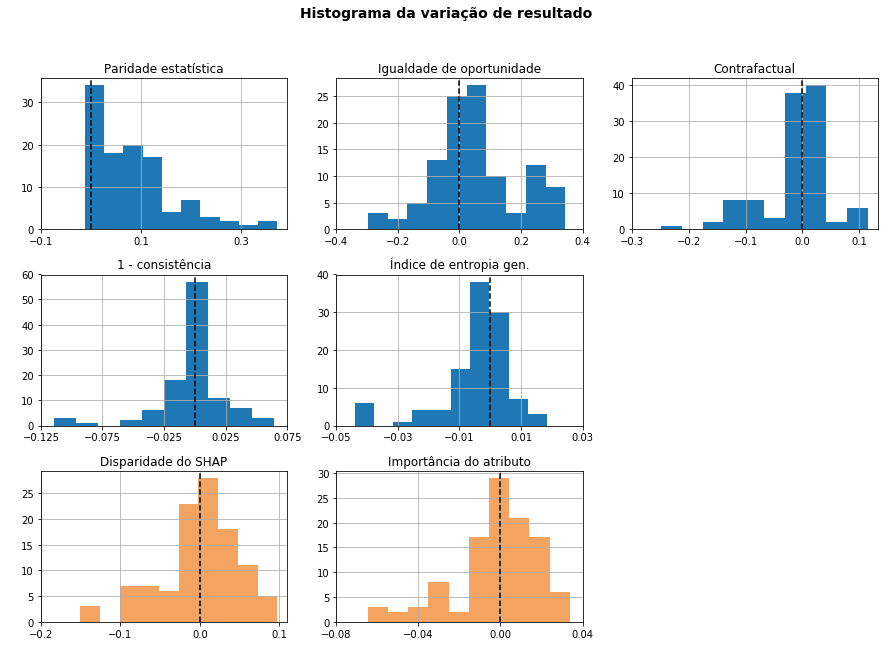

In [57]:
fig, axes = pl.subplots(nrows=3, ncols=3, figsize=(15,10))
pl.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
fairn_order = ['stat_parity', 'equal_opport', 'counterfactual', '1-consistency', 'entropy_index']
shap_order = ['mean_dif', 'feat_import']

idx = 0
for i in range(2):
    for j in range(3):
        ax = axes[i,j]
        name = fairn_order[idx]
        result_difference[name].plot.hist(ax=ax, title=name2title[name], 
                                          grid=True)
        ax.set_xticks(ax.get_xticks()[::2])
        ax.set_ylabel(' ')
        ax.axvline(x=0, color='k', linestyle='--', linewidth=1.5)
        idx += 1
        if idx >= len(fairn_order):
            break

idx = 0
for j in range(3):
    ax = axes[2,j]
    name = shap_order[idx]
    result_difference[name].plot.hist(ax=ax, title=name2title[name], 
                                      grid=True, color='sandybrown')
    ax.set_xticks(ax.get_xticks()[::2])
    ax.set_ylabel(' ')
    ax.axvline(x=0, color='k', linestyle='--', linewidth=1.5)
    idx += 1
    if idx >= len(shap_order):
        break


axes[1,2].axis('off')
axes[2,2].axis('off')
pl.suptitle("Histograma da variação de resultado", fontsize=14, fontweight='bold')

# pl.savefig('analysis_image/hist_metricas.png', bbox_inches='tight', transparent=True)

## Correlação

### Geral

Nessa análise será removido resultados obtidos com o Linear SHAP.

In [58]:
def obtain_df_corr(result_difference, name_var, name2title):
    res = result_difference.corr()[name_var][:5]
    res_all = res.values
    columns = res.index
    col_new_name = [name2title[val] for val in columns]
    res_tree = result_difference[
        result_difference['shap_method'] == 'tree'].corr()[name_var][:5]
    res_kernel = result_difference[
        result_difference['shap_method'] == 'kernel'].corr()[name_var][:5]
    res_matrix = np.matrix([res_all, res_tree, res_kernel])
    df = pd.DataFrame(res_matrix.T, columns=['Completo', 'Tree SHAP', 'Kernel SHAP'])
    df['name'] = col_new_name
    df.set_index('name', inplace=True)
    return df

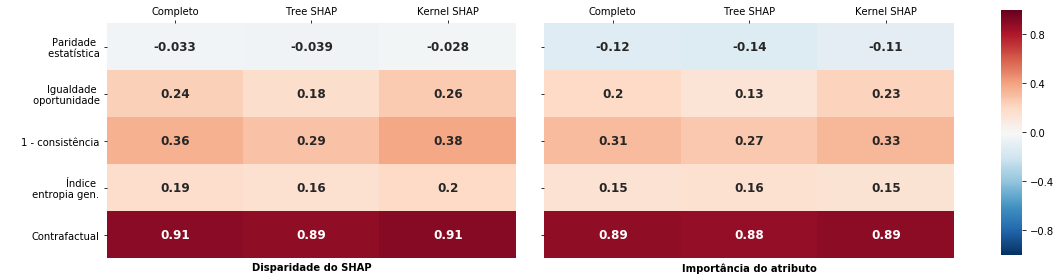

In [59]:
df1 = obtain_df_corr(result_difference, 'mean_dif', name2title2)
df2 = obtain_df_corr(result_difference, 'feat_import', name2title2)

fig, axes = pl.subplots(nrows=1, ncols=2, figsize=(15,4), sharey=True, sharex=True)
cbar_ax = fig.add_axes([0.93, 0.1, .02, 0.85])

sns.heatmap(df1, cmap="RdBu_r",  annot=True, ax=axes[0], vmin=-1, vmax=1, cbar=False, cbar_ax=None,
           annot_kws={'weight': 'bold', "size": 12})
sns.heatmap(df2, cmap="RdBu_r",  annot=True, ax=axes[1], vmin=-1, vmax=1,  cbar=True, cbar_ax=cbar_ax,
            annot_kws={'weight': 'bold', "size": 12})
axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')

axes[0].set_xlabel('Disparidade do SHAP', fontweight='bold')
axes[1].set_xlabel('Importância do atributo', fontweight='bold')
axes[1].xaxis.set_ticks_position('top')
axes[0].xaxis.set_ticks_position('top')

fig.tight_layout(rect=[0, 0, 0.90, 1])

with sns.axes_style('white', {'legend.frameon': True}):
    pl.rc('font', weight='bold')

# pl.show()
# pl.savefig('analysis_image/corr_metricas.png', bbox_inches='tight', transparent=True)

### Apenas Regressão Logística

In [60]:
def obtain_df_corr_linear(result_difference, name_var, name2title):
    res = result_difference.corr()[name_var][:5]
    res_all = res.values
    columns = res.index
    col_new_name = [name2title[val] for val in columns]
    res_lin = result_difference[
        result_difference['shap_method'] == 'linear']
    res_lin = res_lin.corr()[name_var][:5]    
    res_lin_indep = result_difference[
        result_difference['shap_method'] == 'linear_indep']
    res_lin_indep = res_lin_indep.corr()[name_var][:5]

    res_kernel = result_difference[
        result_difference['shap_method'] == 'kernel']
    res_kernel = res_kernel.corr()[name_var][:5]
    res_matrix = np.matrix([res_lin, res_lin_indep, res_kernel])
    df = pd.DataFrame(res_matrix.T, columns=['Linear SHAP (corr)', 'Linear SHAP (indep)', 'Kernel SHAP'])
    df['name'] = col_new_name
    df.set_index('name', inplace=True)
    return df

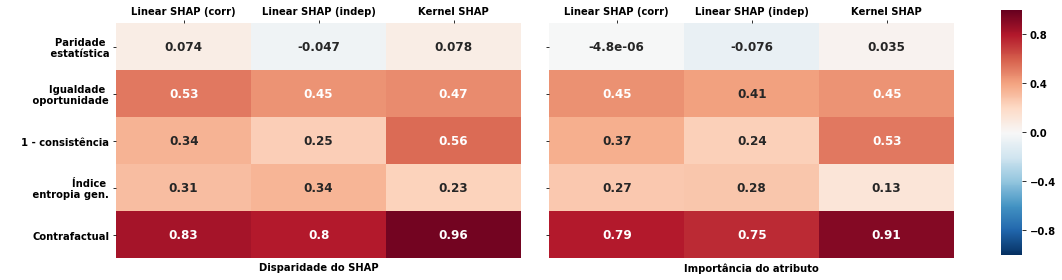

In [61]:
result_difference_linear = result_difference_all[result_difference_all['model'] == 'lr']
df1 = obtain_df_corr_linear(result_difference_linear, 'mean_dif', name2title2)
df2 = obtain_df_corr_linear(result_difference_linear, 'feat_import', name2title2)

fig, axes = pl.subplots(nrows=1, ncols=2, figsize=(15,4), sharey=True, sharex=True)
cbar_ax = fig.add_axes([0.93, 0.1, .02, 0.85])

sns.heatmap(df1, cmap="RdBu_r",  annot=True, ax=axes[0], vmin=-1, vmax=1, cbar=False, cbar_ax=None,
           annot_kws={'weight': 'bold', "size": 12})
sns.heatmap(df2, cmap="RdBu_r",  annot=True, ax=axes[1], vmin=-1, vmax=1,  cbar=True, cbar_ax=cbar_ax,
            annot_kws={'weight': 'bold', "size": 12})
axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')

axes[0].set_xlabel('Disparidade do SHAP', fontweight='bold')
axes[1].set_xlabel('Importância do atributo', fontweight='bold')
axes[1].xaxis.set_ticks_position('top')
axes[0].xaxis.set_ticks_position('top')

fig.tight_layout(rect=[0, 0, 0.90, 1])

with sns.axes_style('white', {'legend.frameon': True}):
    pl.rc('font', weight='bold')

# pl.show()
# pl.savefig('analysis_image/corr_metricas_lr.png', bbox_inches='tight', transparent=True)

### Apenas modelos árvore

In [62]:
def obtain_df_corr_tree(result_difference, name_var, name2title):
    res = result_difference.corr()[name_var][:5]
    res_all = res.values
    columns = res.index
    col_new_name = [name2title[val] for val in columns]

    res_tree = result_difference[
        result_difference['shap_method'] == 'tree']
    res_tree = res_tree.corr()[name_var][:5]

    res_kernel = result_difference[
        result_difference['shap_method'] == 'kernel']

    res_kernel = res_kernel.corr()[name_var][:5]
    res_matrix = np.matrix([res_tree, res_kernel])
    df = pd.DataFrame(res_matrix.T, columns=['Tree SHAP', 'Kernel SHAP'])
    df['name'] = col_new_name
    df.set_index('name', inplace=True)
    return df

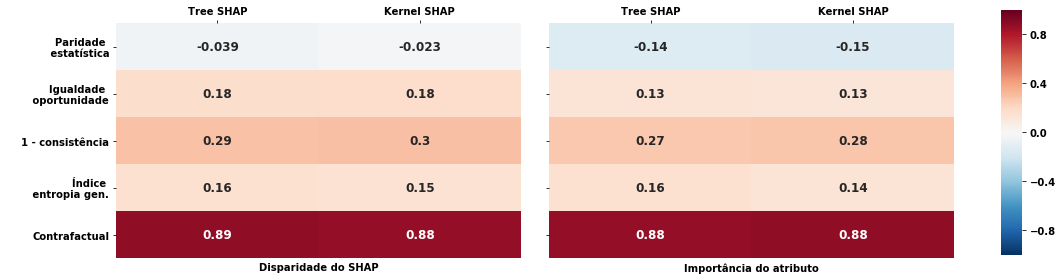

In [63]:
result_difference_tree = result_difference[result_difference['model'].isin(['rf', 'gb'])]
df1 = obtain_df_corr_tree(result_difference_tree, 'mean_dif', name2title2)
df2 = obtain_df_corr_tree(result_difference_tree, 'feat_import', name2title2)

fig, axes = pl.subplots(nrows=1, ncols=2, figsize=(15,4), sharey=True, sharex=True)
cbar_ax = fig.add_axes([0.93, 0.1, .02, 0.85])

sns.heatmap(df1, cmap="RdBu_r",  annot=True, ax=axes[0], vmin=-1, vmax=1, cbar=False, cbar_ax=None,
           annot_kws={'weight': 'bold', "size": 12})
sns.heatmap(df2, cmap="RdBu_r",  annot=True, ax=axes[1], vmin=-1, vmax=1,  cbar=True, cbar_ax=cbar_ax,
            annot_kws={'weight': 'bold', "size": 12})
axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')

axes[0].set_xlabel('Disparidade do SHAP', fontweight='bold')
axes[1].set_xlabel('Importância do atributo', fontweight='bold')
axes[1].xaxis.set_ticks_position('top')
axes[0].xaxis.set_ticks_position('top')

fig.tight_layout(rect=[0, 0, 0.90, 1])

with sns.axes_style('white', {'legend.frameon': True}):
    pl.rc('font', weight='bold')

# pl.show()
# pl.savefig('analysis_image/corr_metricas_rf_gb.png', bbox_inches='tight', transparent=True)

In [64]:
result_difference['model_shape'] = result_difference['model'] + '_' + result_difference['shap_method']

## Gráfico linha

In [65]:
result['shap_model'] = result['shap_method'] + '_' + result['model']
result['model_shape'] = result['model'] + '_' + result['shap_method']

result.sort_values(by='model_shape', inplace=True)
result.head(2)

,name,shap_method,feat_import,feature_pos,unpriv_value,priv_value,acc_test,acc_train,disp_impact,stat_parity,avg_odds,equal_opport,false_discovery_rate,entropy_index,acc_test_clf,acc_test_priv,acc_test_unpriv,consistency,counterfactual,dataset,model,data,new_name,mean_dif,1-consistency,shap_model,model_shape
97,pnad_genero_gb_orig,kernel,0.028716,1,-0.034525,0.024811,0.888,0.895910,0.599157,-0.048262,-0.042617,-0.062637,-0.050287,0.061082,0.888,0.874582,0.907960,0.9216,-0.048495,pnad_genero,gb,orig,pnad_genero_gb,-0.059337,0.0784,kernel_gb,gb_kernel
111,pnad_genero_gb_usd0,kernel,0.013743,3,-0.021509,0.008476,0.891,0.895484,1.022699,0.002429,0.075597,0.148535,0.029830,0.058933,0.891,0.874582,0.915423,0.9168,-0.018395,pnad_genero,gb,usd0,pnad_genero_gb,-0.029985,0.0832,kernel_gb,gb_kernel


### Geral

In [66]:
def remove_axis_full(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
def remove_axis(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

def obtain_subplot(result, ax, dataset, metric, name2title, ylabel=True, title=False):
    xlabel = 'model_shape'
    result[(result['dataset'] == dataset) & 
       (result['data'] == 'orig')].plot(x=xlabel, y=metric, ax=ax, legend=False,
                                      color='tomato', style='.-')
    result[(result['dataset'] == dataset) & 
           (result['data'] == 'rw')].plot(x=xlabel, y=metric, ax=ax, legend=False,
                                          color='steelblue', style='-s')
    result[(result['dataset'] == dataset) & 
           (result['data'] == 'usd-1')].plot(x=xlabel, y=metric, ax=ax, legend=False,
                                            color='slategrey', style='-^')
    result[(result['dataset'] == dataset) & 
           (result['data'] == 'usd0')].plot(x=xlabel, y=metric, ax=ax, legend=False,
                                           color='darkblue', style='--o')
    if metric != 'entropy_index':
        ax.axhline(y=0, color='k', linestyle='--', linewidth=1.1)
    remove_axis(ax)
    ax.set_facecolor('xkcd:white')
    if ylabel:
        ax.set_ylabel(name2title[metric], fontsize=10, fontweight='bold')
    if title:
        ax.set_title(name2title[metric], fontsize=10, fontweight='bold', color='gray')        

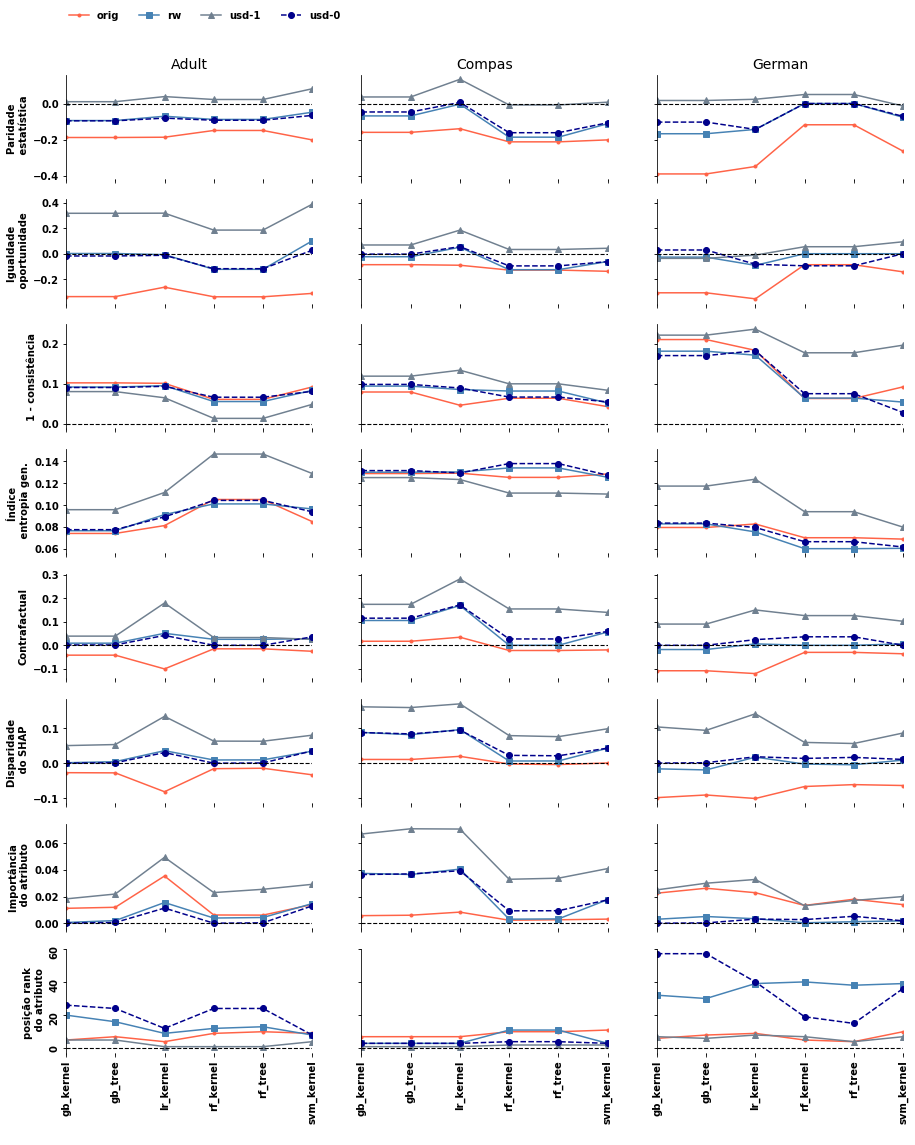

In [67]:
fig, axes = pl.subplots(nrows=8, ncols=3, figsize=(15, 18), sharex=True, sharey='row')

lst_datasets = ['adult', 'compas', 'german']
lst_mestrics = ['stat_parity', 'equal_opport', '1-consistency', 'entropy_index', 
                'counterfactual', 'mean_dif', 'feat_import', 'feature_pos']
axes_flat = axes.flat
i = 0
for metric in lst_mestrics:
    for dataset in lst_datasets:
        obtain_subplot(result, axes_flat[i], dataset, metric, name2title2)
        i += 1
        
pl.xticks(rotation=90)
pl.xlabel(' ')

axes[0,0].set_title('Adult', fontsize=14)
axes[0,1].set_title('Compas', fontsize=14)
axes[0,2].set_title('German', fontsize=14)

axes_flat[-2].set_xlabel(' ')
axes_flat[-3].set_xlabel(' ')
axes_flat[-2].tick_params(rotation=90)
axes_flat[-3].tick_params(rotation=90)
pl.legend(['orig', 'rw', 'usd-1', 'usd-0'], bbox_to_anchor=(-1.25, 10.1), frameon=False, ncol=4)
# pl.show()
# pl.savefig('analysis_image/linha_metricas_adult_compass_german.png', bbox_inches='tight', transparent=True)

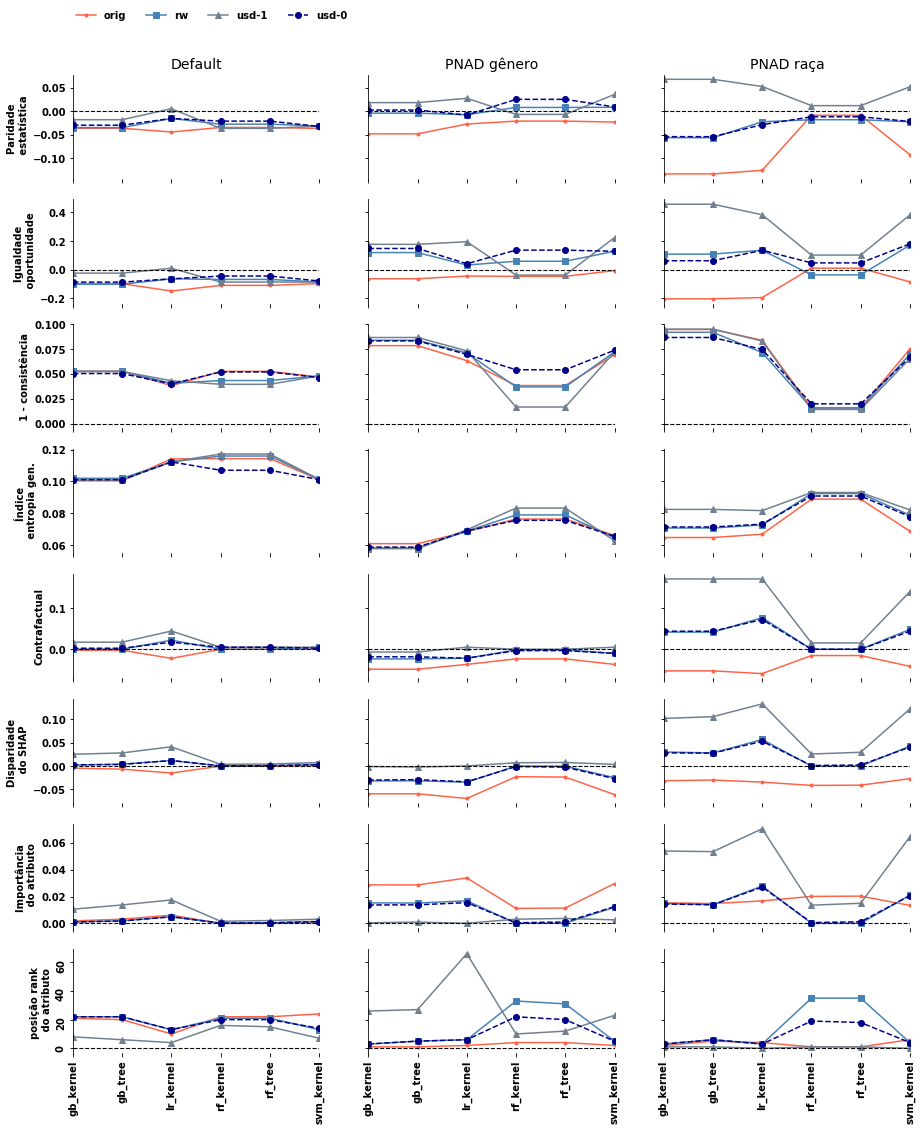

In [68]:
fig, axes = pl.subplots(nrows=8, ncols=3, figsize=(15, 18), sharex=True, sharey='row')

lst_datasets = ['default', 'pnad_genero', 'pnad_raca']

lst_mestrics = ['stat_parity', 'equal_opport', '1-consistency', 'entropy_index', 
                'counterfactual', 'mean_dif', 'feat_import', 'feature_pos']
axes_flat = axes.flat
i = 0
for metric in lst_mestrics:
    for dataset in lst_datasets:
        obtain_subplot(result, axes_flat[i], dataset, metric, name2title2)
        i += 1
        
pl.xticks(rotation=90)
pl.xlabel(' ')

axes[0,0].set_title('Default', fontsize=14)
axes[0,1].set_title('PNAD gênero', fontsize=14)
axes[0,2].set_title('PNAD raça', fontsize=14)

axes_flat[-2].set_xlabel(' ')
axes_flat[-3].set_xlabel(' ')
axes_flat[-2].tick_params(rotation=90)
axes_flat[-3].tick_params(rotation=90)
pl.legend(['orig', 'rw', 'usd-1', 'usd-0'], bbox_to_anchor=(-1.25, 10.1), frameon=False, ncol=4)
# pl.show()
# pl.savefig('analysis_image/linha_metricas_default_pnad.png', bbox_inches='tight', transparent=True)

### Dataset

In [69]:
result_tree = result[result['model'].isin(['rf', 'gb'])]
result.head(1)

,name,shap_method,feat_import,feature_pos,unpriv_value,priv_value,acc_test,acc_train,disp_impact,stat_parity,avg_odds,equal_opport,false_discovery_rate,entropy_index,acc_test_clf,acc_test_priv,acc_test_unpriv,consistency,counterfactual,dataset,model,data,new_name,mean_dif,1-consistency,shap_model,model_shape
97,pnad_genero_gb_orig,kernel,0.028716,1,-0.034525,0.024811,0.888,0.89591,0.599157,-0.048262,-0.042617,-0.062637,-0.050287,0.061082,0.888,0.874582,0.90796,0.9216,-0.048495,pnad_genero,gb,orig,pnad_genero_gb,-0.059337,0.0784,kernel_gb,gb_kernel


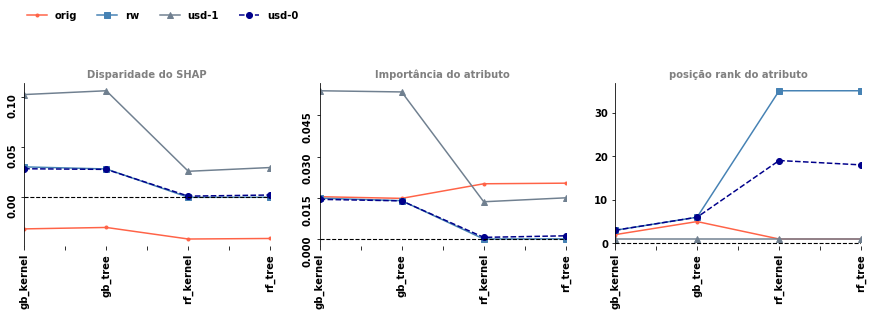

In [70]:
name2title3 = {'equal_opport': 'Igualdade oportunidade',
              'entropy_index': 'Índice entropia gen.',
              'counterfactual': 'Contrafactual',
              'feat_import': 'Importância do atributo',
              'mean_dif': 'Disparidade do SHAP',
             '1-consistency': '1 - consistência',
              'stat_parity': 'Paridade estatística',
              'feature_pos':  'posição rank do atributo'}

fig, axes = pl.subplots(nrows=1, ncols=3, figsize=(15, 3))#, sharex=True)

lst_datasets = ['pnad_raca']
lst_mestrics = ['mean_dif', 'feat_import', 'feature_pos']
axes_flat = axes.flat
i = 0
for metric in lst_mestrics:
    for dataset in lst_datasets:
        if i == 5:
            pass
        else:
            obtain_subplot(result_tree, axes_flat[i], dataset, metric, name2title3,
                       ylabel=False, title=True)
        i += 1
        
pl.xticks(rotation=90)
pl.xlabel(' ')

for ax in axes_flat:
    ax.yaxis.set_major_locator(pl.MaxNLocator(4))

axes_flat[-2].set_xlabel(' ')
axes_flat[-3].set_xlabel(' ')
axes_flat[-2].tick_params(rotation=90)
axes_flat[-3].tick_params(rotation=90)
pl.legend(['orig', 'rw', 'usd-1', 'usd-0'], bbox_to_anchor=(-1.25, 1.5), frameon=False, ncol=4)

# pl.show()
# pl.savefig('analysis_image/linha_metricas_{}.png'.format(lst_datasets[0]), 
#            bbox_inches='tight', transparent=True)